In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_excel('cyber_data.xlsx')

In [3]:
dataset

,Organization,Incident,Asset Value,Threat Level,Vulnerability,Control Strength,Details,Attack Type,Impact,Root Cause,Time to Remediate in Months,Industry,Security Maturity,Security Spending
0,Adobe,Adobe Data Breach 2024,1B,Medium,Medium,High,"Customer accounts compromised, data stolen",Phishing,Financial,Social Engineering,1.00,Technology,Medium,0.20
1,Airbnb,Airbnb API Exposure 2024,850M,Medium,Medium,Medium,Host and guest information exposed through API,API Exploitation,Reputational,Configuration Error,0.50,Hospitality,Medium,0.15
2,Amazon,Amazon Internal Leak 2024,1.3B,Medium,Medium,High,"Internal documents accessed, data leaked",Insider Threat,Operational,Insider Access,0.75,E-commerce,High,0.25
3,American Airlines,AA Payment Info Breach 2024,850M,High,Medium,Medium,Customer payment information exposed,Malware,Financial,Malware Infection,1.00,Transportation,Medium,0.20
4,Apple,Apple API Vulnerability 2024,1.6B,Medium,Medium,High,Customer information accessed through API vuln.,API Exploitation,Reputational,Poor API Security,2.00,Technology,High,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Wix,Website Data Breach,750M,Medium,High,Medium,"Website vulnerability exploited, exposing user...",Phishing,Financial,Unknown,0.50,Technology,Medium,0.20
103,Uber Eats,Customer Data Theft,850M,High,High,High,Customer data stolen through misconfigured del...,Data Leak,Operational,External Breach,1.00,Technology,High,0.25
104,Walmart,Employee Data Breach,1.4B,High,Medium,High,Employee data accessed through phishing attack,Phishing,Financial,Insider Access,1.00,Retail,High,0.30
105,Boeing,Aircraft Design Data Theft,1.5B,High,High,High,Aircraft design data stolen through supplier n...,Supply Chain,Operational,External Breach,2.00,Aerospace,High,0.32


In [4]:
dataset.shape

(107, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Organization                 107 non-null    object 
 1   Incident                     107 non-null    object 
 2   Asset Value                  107 non-null    object 
 3   Threat Level                 107 non-null    object 
 4   Vulnerability                107 non-null    object 
 5   Control Strength             107 non-null    object 
 6   Details                      107 non-null    object 
 7   Attack Type                  107 non-null    object 
 8   Impact                       107 non-null    object 
 9   Root Cause                   107 non-null    object 
 10  Time to Remediate in Months  107 non-null    float64
 11  Industry                     107 non-null    object 
 12  Security Maturity            107 non-null    object 
 13  Security Spending   

In [6]:
dataset.describe()

,Time to Remediate in Months,Security Spending
count,107.000000,107.000000
mean,1.100467,0.197570
std,0.556755,0.051759
min,0.500000,0.080000
25%,0.750000,0.160000
50%,1.000000,0.190000
75%,1.000000,0.235000
max,3.000000,0.320000


## Impact of the Most Frequent Attack Type

In [7]:
# Identify the most frequent attack types
attack_counts = dataset['Attack Type'].value_counts()

# Analyze the impact of the most frequent attack type
most_frequent_attack = attack_counts.index[0]
impact_of_most_frequent = dataset[dataset['Attack Type'] == most_frequent_attack]['Impact'].value_counts()


most_frequent_attack


'Phishing'

The analysis reveals that phishing attacks are the most frequent attack type

In [8]:
print("Impact of", most_frequent_attack, "attacks:")
impact_of_most_frequent

Impact of Phishing attacks:


Impact
Reputational               14
Financial                  11
Operational                 5
Financial, Reputational     3
Operational, Financial      1
Reputational, Financial     1
Name: count, dtype: int64

In [9]:
most_frequent_attack = attack_counts.index[0]
attack_types = attack_counts.index.to_numpy()
attack_counts = attack_counts.to_numpy()

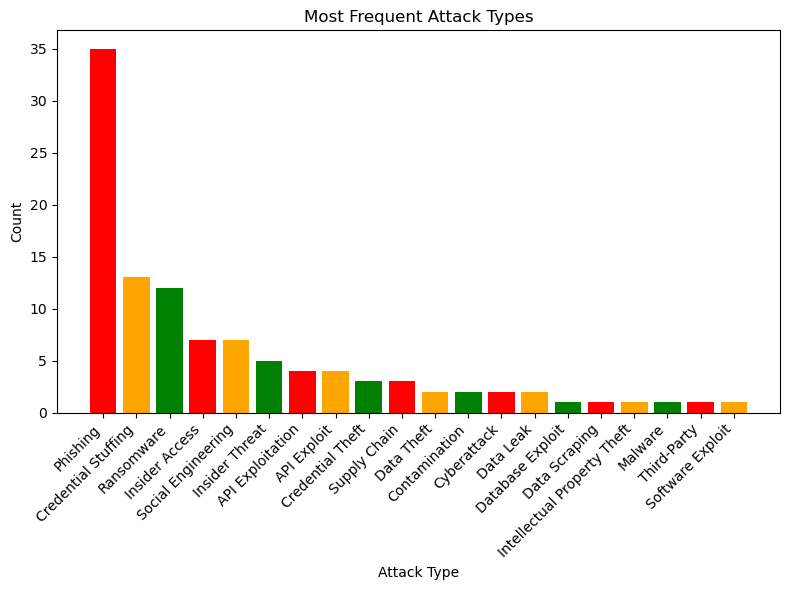

In [10]:
# Create the bar graph
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(attack_types, attack_counts, color=['red', 'orange', 'green'])  # Customize colors if desired
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Most Frequent Attack Types')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Display the graph
plt.show()

As you can see, phishing attacks pose a significant threat across various impact categories. The most common consequences are reputational damage and financial loss. However, they can also lead to operational disruptions and a combination of these negative effects.

### Recommendations:

1) Implement strong email filtering and security awareness training to mitigate phishing attempts.
2) Regularly test employees on their ability to identify phishing emails.
3) Have a clear incident response plan in place to address phishing attacks effectively.

## Most Frequent Root Causes of Security Incidents 

In [11]:
# Identify the most frequent root causes
root_cause_counts = dataset['Root Cause'].value_counts()

In [12]:
# Print the most common root causes
print("Most frequent root causes of security incidents:")
root_cause_counts

Most frequent root causes of security incidents:


Root Cause
Insider Access                             42
Social Engineering                         21
Unknown                                    17
External Breach                             9
Weak API Security                           3
Poor API Security                           2
Weak Passwords                              2
Negligence in quality control processes     2
Exploited software vulnerability            2
Configuration Error                         1
Malware Infection                           1
Weak Password Policies                      1
API Misconfiguration                        1
Poor Patch Management                       1
Phishing                                    1
Insider access or external hacking          1
Name: count, dtype: int64

### Insider Threats:

Insider Access (42) emerges as the most concerning root cause. This highlights the importance of robust access controls, user activity monitoring, and data loss prevention (DLP) measures to mitigate insider threats.


### Social Engineering:



Social Engineering (21) is another prevalent threat. This emphasizes the need for regular security awareness training to educate employees on how to identify and avoid social engineering tactics.

### Unidentified Root Causes:



Unknown (17) represents a significant number of incidents where the root cause couldn't be determined. Investing in better incident response processes and forensics capabilities can help identify root causes more effectively.

### External Threats:



External Breach (9) signifies the importance of strong perimeter security measures like firewalls and intrusion detection systems to prevent external attacks.

### Recommendations:

1) Implement a layered security approach that addresses both internal and external threats.
2) Prioritize user education and awareness training on social engineering tactics.
3) Strengthen access controls and monitor user activity to mitigate insider threats.
4) Invest in incident response and forensics capabilities to identify root causes effectively.
5) Regularly assess and patch vulnerabilities in software and systems.
6) Implement strong security practices for APIs to prevent unauthorized access.

In [13]:
# Prepare data for the bar graph
most_frequent_root_cause = root_cause_counts.index[0]
root_causes = root_cause_counts.index.to_numpy()
root_cause_counts = root_cause_counts.to_numpy()

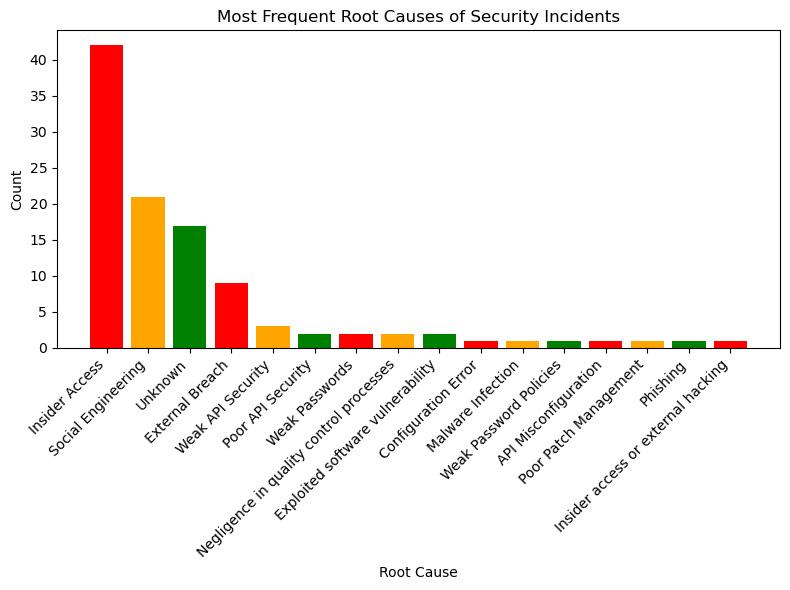

In [14]:
# Create the bar graph
plt.figure(figsize=(8, 6))  
plt.bar(root_causes, root_cause_counts, color=['red', 'orange', 'green']) 
plt.xlabel('Root Cause')
plt.ylabel('Count')
plt.title('Most Frequent Root Causes of Security Incidents')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Display the graph
plt.show()

## Correlation Analysis between Security Metrics

In [15]:
# Label encoding for Security Maturity (if categorical)
security_maturity_mapping = {"Low": 1, "Medium": 2, "High": 3}
dataset['Security Maturity_Code'] = dataset['Security Maturity'].replace(security_maturity_mapping)


C:\Users\sanju\AppData\Local\Temp\ipykernel_20452\3566941292.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Security Maturity_Code'] = dataset['Security Maturity'].replace(security_maturity_mapping)


This analysis explores the relationships between security metrics after encoding the "Security Maturity" variable into numerical categories. The encoding scheme is:

Low = 1
Medium = 2
High = 3

In [17]:
# Correlation analysis using encoded values
correlation = dataset[['Security Maturity_Code', 'Security Spending', 'Time to Remediate in Months']].corr()

In [18]:
correlation

,Security Maturity_Code,Security Spending,Time to Remediate in Months
Security Maturity_Code,1.000000,0.776369,0.056502
Security Spending,0.776369,1.000000,0.136229
Time to Remediate in Months,0.056502,0.136229,1.000000


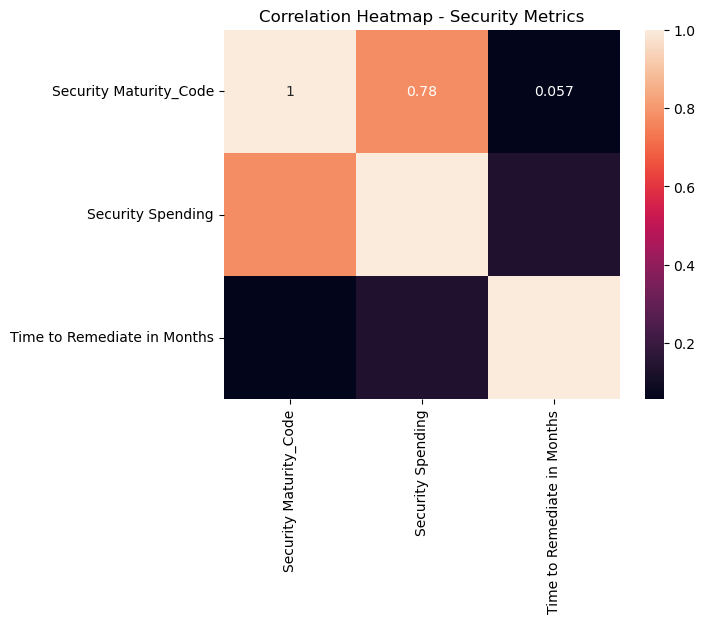

In [19]:
# Heatmap using seaborn
sns.heatmap(correlation, annot=True)  
plt.title("Correlation Heatmap - Security Metrics")
plt.show()

1) A positive correlation (0.776) exists between Security Maturity_Code and Security Spending. This suggests that organizations with a higher security maturity level (represented by a higher code value) tend to spend more on security.
2) The correlation between Security Maturity_Code and Time to Remediate in Months is weak (0.056), indicating a negligible linear relationship.
3) The correlation between Security Spending and Time to Remediate in Months is also weak (0.136), suggesting a potentially weak linear association between these two metrics.

Correlation does not imply causation. While the analysis shows a positive correlation between security maturity and spending, it doesn't necessarily mean that spending more directly causes higher maturity. It could be that more mature organizations have a greater need or budget for security investments.

## Security Maturity vs. Security Spending

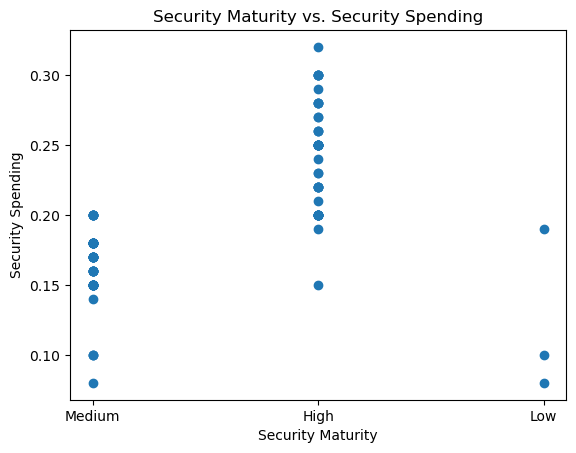

In [22]:
# Scatter plot (Security Maturity vs. Security Spending)
plt.scatter(dataset['Security Maturity'], dataset['Security Spending'])
plt.xlabel('Security Maturity')
plt.ylabel('Security Spending')
plt.title('Security Maturity vs. Security Spending')
plt.show()

This scatter plot depicts the relationship between an organization's security maturity and its security spending. Security maturity represents the overall effectiveness of an organization's cybersecurity posture, while security spending refers to the financial investment in cybersecurity measures.

### Positive Correlation: 

The plot suggests a positive correlation between these two variables. As security maturity increases, security spending also tends to increase. This aligns with the intuition that organizations with a stronger security posture are likely to invest more resources in maintaining and improving their cybersecurity defenses.

###  Data Points:

The scatter plot allows us to visualize the distribution of data points. While there's a general upward trend, there's also some scatter around the trendline. This indicates that security spending can vary even among organizations with similar security maturity levels. Factors not captured in this analysis, such as industry, regulatory requirements, and specific security threats, can influence spending decisions.